<a href="https://colab.research.google.com/github/vamsipyla2000/ML_models_comparison/blob/main/Random_Forest_car_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing required Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [ ]:
# Loading data
df = pd.read_csv("/content/car_evaluation.csv", header=None)
df.shape
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
# Preprocessing the data
col_names = ['buying', 'maintanance', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
col_names
df.head()


,buying,maintanance,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   buying       1728 non-null   object
 1   maintanance  1728 non-null   object
 2   doors        1728 non-null   object
 3   persons      1728 non-null   object
 4   lug_boot     1728 non-null   object
 5   safety       1728 non-null   object
 6   class        1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
columns=df.columns
for col in columns:
 print(df[col].value_counts())

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maintanance
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
# Initialize the OrdinalEncoder
encoder = OrdinalEncoder()
# Apply the encoder to the specified columns in X_train and X_test
df[df.columns] = encoder.fit_transform(df[df.columns])
# Preview the transformed training data
df.head()

,buying,maintanance,doors,persons,lug_boot,safety,class
0,3.0,3.0,0.0,0.0,2.0,1.0,2.0
1,3.0,3.0,0.0,0.0,2.0,2.0,2.0
2,3.0,3.0,0.0,0.0,2.0,0.0,2.0
3,3.0,3.0,0.0,0.0,1.0,1.0,2.0
4,3.0,3.0,0.0,0.0,1.0,2.0,2.0


In [ ]:
X = df.drop(['class'], axis=1)

y = df['class']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)
X_train.shape, X_test.shape

((1157, 6), (571, 6))

In [ ]:

# from sklearn.preprocessing import OrdinalEncoder
# # Initialize the OrdinalEncoder
# encoder = OrdinalEncoder()
# # Apply the encoder to the specified columns in X_train and X_test
# X_train[X_train.columns] = encoder.fit_transform(X_train[X_train.columns])
# X_test[X_train.columns] = encoder.transform(X_test[X_train.columns])

# # Preview the transformed training data
# X_train.head()

,buying,maintanance,doors,persons,lug_boot,safety
48,3.0,3.0,1.0,2.0,1.0,1.0
468,0.0,3.0,1.0,1.0,2.0,1.0
155,3.0,0.0,1.0,2.0,2.0,0.0
1721,1.0,1.0,3.0,2.0,2.0,0.0
1208,2.0,1.0,0.0,2.0,2.0,0.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=10,random_state=0)

rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9475


In [ ]:
# After changing number of estimtors
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)
# fit the model to the training set
rfc_100.fit(X_train, y_train)
y_pred_100 = rfc_100.predict(X_test)
# Check accuracy score
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9545


In [ ]:
feature_scores = pd.Series(rfc_100.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

,0
safety,0.265392
persons,0.222230
buying,0.201751
maintanance,0.154568
lug_boot,0.089286
doors,0.066773


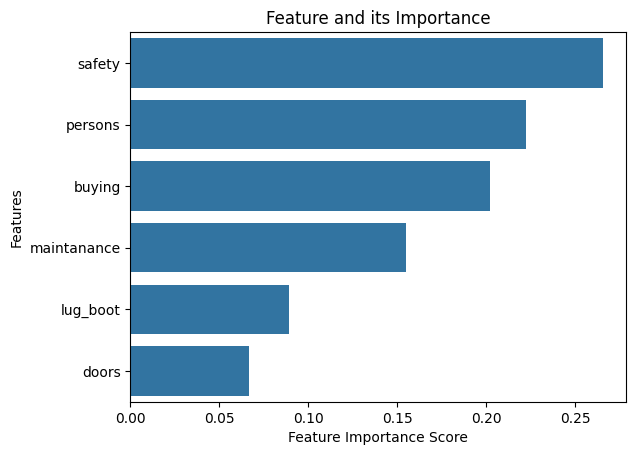

In [ ]:
sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')

plt.title("Feature and its Importance")



# Visualize the graph

plt.show()

After Visualizing the importance of each feature , I decided to drop last two important features (doors and lug_boot)

In [ ]:
X = df.drop(['class','doors','lug_boot'], axis=1)

y = df['class']
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.33, random_state = 42)
X_train1.shape, X_test1.shape

((1157, 4), (571, 4))

In [ ]:
# from sklearn.preprocessing import OrdinalEncoder

# # Initialize the OrdinalEncoder
# encoder = OrdinalEncoder()

# # Apply the encoder to the specified columns in X_train and X_test
# X_train1[X_train1.columns] = encoder.fit_transform(X_train1[X_train1.columns])
# X_test1[X_train1.columns] = encoder.transform(X_test1[X_train1.columns])
# X_train1.head()

,buying,maintanance,persons,safety
48,3.0,3.0,2.0,1.0
468,0.0,3.0,1.0,1.0
155,3.0,0.0,2.0,0.0
1721,1.0,1.0,2.0,0.0
1208,2.0,1.0,2.0,0.0


In [ ]:
# After changing number of features (dropping two features)
rfc1 = RandomForestClassifier(n_estimators=10, random_state=0)
# fit the model to the training set
rfc1.fit(X_train1, y_train1)
y_pred1_1000 = rfc1.predict(X_test1)
# Check accuracy score
print('Model accuracy score with 1000 decision-trees : {0:0.4f}'. format(accuracy_score(y_test1, y_pred1_1000)))

Model accuracy score with 1000 decision-trees : 0.8546


Model accuracy fall from 0.9667 to 0.8546 so I decided to drop only one feature (doors)

In [ ]:
X = df.drop(['class','doors'], axis=1)
y = df['class']
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.33, random_state = 42)
print(X_train2.shape)
print(X_test2.shape)
from sklearn.preprocessing import OrdinalEncoder
# Initialize the OrdinalEncoder
# encoder = OrdinalEncoder()
# # Apply the encoder to the specified columns in X_train and X_test
# X_train2[X_train2.columns] = encoder.fit_transform(X_train2[X_train2.columns])
# X_test2[X_train2.columns] = encoder.transform(X_test2[X_train2.columns])
# X_train2.head()
# After changing number of features (dropping one feature)
rfc2 = RandomForestClassifier(n_estimators=10, random_state=0)
# fit the model to the training set
rfc2.fit(X_train2, y_train2)
y_pred2 = rfc2.predict(X_test2)
# Check accuracy score
print('Model accuracy score with 1000 decision-trees : {0:0.4f}'. format(accuracy_score(y_test2, y_pred2)))

(1157, 5)
(571, 5)
Model accuracy score with 1000 decision-trees : 0.9264



*   Accuracy of random forest classifier with 10 estimators and all the features is 0.9475
*   Accuracy of random forest classifier with 100 estimators and all the features is 0.9545
*   Accuracy of random forest classifier with 10 estimators and all removing two least features is 0.8546
*  Accuracy of random forest classifier with 10 estimators and all removing two least features is 0.9264

It was concluded that all the features have significant importance in model building.

